### README ###

This is a rudimental attempt at visualizing the comparison between the different clusterings.

Generally speaking, all comparison metrics have been dumped in the form of a pandas dataframe.

For all community detection algorithms, 

In [11]:
import pandas as pd
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Example: for a fixed dataset (ita_elections), plot the heatmap of the Variation of Information (VI) between the partitions obtained with different algorithms ###

In [3]:
with open('mutual_info_ita_elections/VI_df.pickle', 'rb') as f:
    df = pickle.load(f)

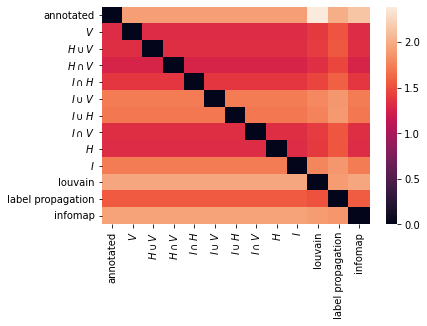

In [4]:
sns.heatmap(df)

### Example: for a fixed algorithm, plot the heatmap of the Adjusted Mutual Information (AMI) between the partitions obtained with that algorithms on different datasets ###

In [5]:
# projection onto the verified users
with open('mutual_info_topic/AMI_df_topic_V.pickle', 'rb') as f:
    df_V = pickle.load(f)

In [6]:
# louvain
with open('mutual_info_topic/AMI_df_topic_louvain.pickle', 'rb') as f:
    df_l = pickle.load(f)

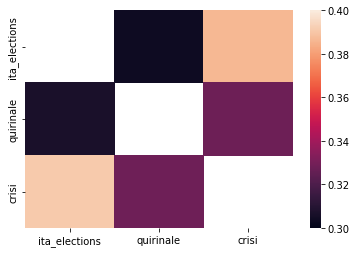

In [15]:
# mask the diagonal, which is 1 by definition
# vmin and vmax have been set manually to make the two plots comparable (try running it without such options)
sns.heatmap(df_V, mask=np.eye(3), vmin=0.3, vmax=.4)

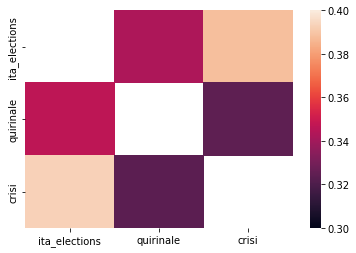

In [16]:
# mask the diagonal, which is 1 by definition
sns.heatmap(df_l, mask=np.eye(3), vmin=0.3, vmax=.4)

### Example: for a given dataset (crisi) and a given algorithm, plot the accuracy (precision/recall/specificity) of each cluster with respect to all manually annotated clusters 

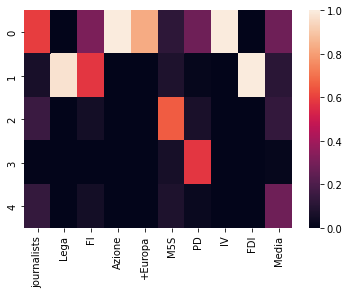

In [55]:
# verified recall
with open('accuracy_crisi/recall_V.pickle', 'rb') as f:
    df_V_recall = pickle.load(f)
    
sns.heatmap(df_V_recall)

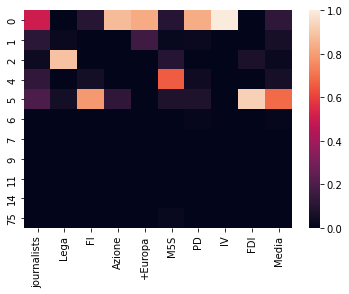

In [56]:
# louvain recall
with open('accuracy_crisi/recall_louvain.pickle', 'rb') as f:
    df_l_recall = pickle.load(f)
sns.heatmap(df_l_recall)

### Example: fix a dataset (quirinale); for each algorithm and for each annotated community, take the cluster obtained with that algorithm that has the highest recall with respect to that community; compute the everage; plot the heatmap and a barplot of the average; also show the precision and specificity of the clusters that maximize the recall; also show the f1-score

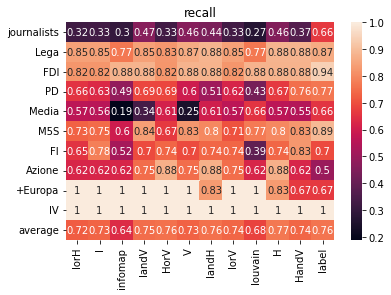

In [45]:
# recall

dataset = 'quirinale'
path = f'accuracy_{dataset}'
data = {}
index = []
maxs = {}
for fname in os.listdir(path):
    if 'recall' in fname:
        alg = fname.split('.')[0].split('_')[1]
        index.append(alg)
        with open(path+'/'+fname, 'rb') as f:
            df = pickle.load(f)
            d = df.max(axis=0).to_dict()
            t = df.idxmax(axis=0).to_dict()
            for k,v in d.items():
                data.setdefault(k,[]).append(v)
            for k,v in t.items():
                maxs.setdefault(k,{})
                maxs[k][alg] = v
df_recall = pd.DataFrame(data)
df_recall.index = index
df_recall['average'] = df_recall.mean(axis=1)

sns.heatmap(df_recall.transpose(), annot=True)
plt.title('recall')
plt.savefig('recall_heatmap_quirinale.png')

[Text(0, 0, 'IorH'),
 Text(0, 0, 'I'),
 Text(0, 0, 'infomap'),
 Text(0, 0, 'IandV'),
 Text(0, 0, 'HorV'),
 Text(0, 0, 'V'),
 Text(0, 0, 'IandH'),
 Text(0, 0, 'IorV'),
 Text(0, 0, 'louvain'),
 Text(0, 0, 'H'),
 Text(0, 0, 'HandV'),
 Text(0, 0, 'label')]

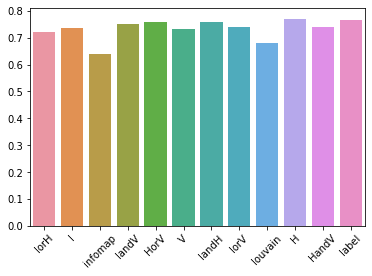

In [46]:
means = df_recall['average'].to_dict()
ax = sns.barplot(x=list(means.keys()), y=list(means.values()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

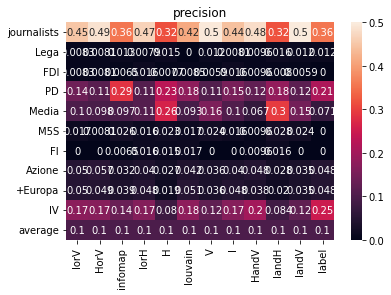

In [47]:
# show the precision of the same clusters (we use the same maxs found above)

dataset = 'quirinale'
path = f'accuracy_{dataset}'
data = {}
index = []
for fname in os.listdir(path):
    if 'precision' in fname:
        alg = fname.split('.')[0].split('_')[1]
        index.append(alg)
        with open(path+'/'+fname, 'rb') as f:
            df = pickle.load(f)
            # d = df.max(axis=0).to_dict()
            d = {c:df[c][maxs[k][alg]] for c in df.columns}
            for k,v in d.items():
                data.setdefault(k,[]).append(v)
df_precision = pd.DataFrame(data)
df_precision.index = index
df_precision['average'] = df_precision.mean(axis=1)

sns.heatmap(df_precision.transpose(), annot=True)
plt.title('precision')
plt.savefig('precision_heatmap_quirinale.png')

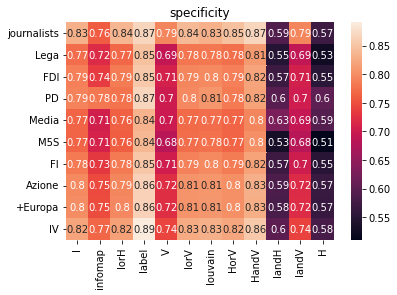

In [48]:
dataset = 'quirinale'
path = f'accuracy_{dataset}'
data = {}
index = []
for fname in os.listdir(path):
    if 'specificity' in fname:
        alg = fname.split('.')[0].split('_')[1]
        index.append(alg)
        with open(path+'/'+fname, 'rb') as f:
            df = pickle.load(f)
            # d = df.max(axis=0).to_dict()
            d = {c:df[c][maxs[k][alg]] for c in df.columns}
            for k,v in d.items():
                data.setdefault(k,[]).append(v)
df = pd.DataFrame(data)
df.index = index

sns.heatmap(df.transpose(), annot=True)
plt.title('specificity')
plt.savefig('specificity_heatmap_quirinale.png')

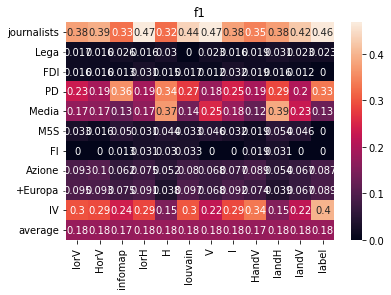

In [49]:
# beware that here I am considering the two df used above, where the precision is not the max precision
# this should probably done building first the f1 df and then finding the max as done for the recall

f1 = 2*df_precision.values*df_recall.values/(df_precision.values+df_recall.values)
df_f1 = pd.DataFrame(f1, columns=df_precision.columns, index=df_precision.index)
sns.heatmap(df_f1.transpose(), annot=True)
plt.title('f1')
plt.savefig('f1_heatmap_quirinale.png')